In [1]:
#import all necessary liberty

%matplotlib inline
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold

from scipy.stats import zscore

import pandas as pd

#missing value handle
from sklearn.preprocessing import Imputer

#To shuffle the data set
from sklearn.utils import shuffle

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam
#from sklearn.utils import shuffle
import csv

#spliting dataset into traning set and test set
from sklearn.model_selection import train_test_split
import itertools

import os


from keras.models import Sequential
from keras.layers.core import Dense, Activation
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics

Using TensorFlow backend.


In [2]:
data_frame_798 = pd.read_csv('data_798.tab', sep='\t')
data_frame_834 = pd.read_csv('data_834.tab', sep='\t')
data_frame_m = pd.read_csv('RihanSirPreprocess.tab', sep='\t')
df = pd.read_csv('data_798.tab', sep='\t')
print(len(data_frame_798))
print(len(data_frame_834))
print(len(data_frame_m))

798
834
835


In [89]:
#RihanSirPreprocess.tab
data_frame = pd.read_csv('RihanSirPreprocess.tab', sep='\t')
df = pd.read_csv('RihanSirPreprocess.tab', sep='\t')
len(data_frame)

835

In [3]:
data_frame_m.head(5)

,Age,Sex,Smoking,HTN,DLP,DM,Physical Exercise,Family History,Drug History,Psychological Stress,Chest Pain,Dyspnea,Palpitation,ECG,IHD-HeartAttack,Risk Score,Risk Type,low,medium,high
0,1.30,2.225541,1.105171,2.718282,1.105171,2.718282,2.718282,2.718282,2.718282,1.105171,2.718282,1.105171,1.105171,1.105171,1,28,medium,0,1,0
1,0.96,2.225541,1.105171,2.718282,1.105171,2.718282,2.718282,2.718282,2.718282,1.105171,2.718282,1.105171,1.105171,1.105171,0,27,medium,0,1,0
2,1.60,2.225541,2.718282,2.718282,1.105171,2.718282,1.105171,2.718282,2.718282,1.105171,1.105171,1.105171,1.105171,1.105171,1,33,high,0,0,1
3,1.34,2.225541,1.648721,2.718282,1.105171,1.105171,2.718282,2.718282,2.718282,1.105171,2.718282,2.718282,1.105171,1.105171,1,29,medium,0,1,0
4,1.10,2.225541,1.648721,2.718282,1.105171,1.105171,2.718282,2.718282,1.105171,1.105171,2.718282,2.718282,1.105171,1.105171,1,29,medium,0,1,0


In [4]:
data_frame_m.drop(["Risk Type","low","medium","high"],axis=1,inplace=True)

In [5]:
data_frame_m.head(5)

,Age,Sex,Smoking,HTN,DLP,DM,Physical Exercise,Family History,Drug History,Psychological Stress,Chest Pain,Dyspnea,Palpitation,ECG,IHD-HeartAttack,Risk Score
0,1.30,2.225541,1.105171,2.718282,1.105171,2.718282,2.718282,2.718282,2.718282,1.105171,2.718282,1.105171,1.105171,1.105171,1,28
1,0.96,2.225541,1.105171,2.718282,1.105171,2.718282,2.718282,2.718282,2.718282,1.105171,2.718282,1.105171,1.105171,1.105171,0,27
2,1.60,2.225541,2.718282,2.718282,1.105171,2.718282,1.105171,2.718282,2.718282,1.105171,1.105171,1.105171,1.105171,1.105171,1,33
3,1.34,2.225541,1.648721,2.718282,1.105171,1.105171,2.718282,2.718282,2.718282,1.105171,2.718282,2.718282,1.105171,1.105171,1,29
4,1.10,2.225541,1.648721,2.718282,1.105171,1.105171,2.718282,2.718282,1.105171,1.105171,2.718282,2.718282,1.105171,1.105171,1,29


In [6]:
data_frame_m = data_frame_m[['Age', 'Sex', 'Smoking', 'HTN', 'DLP', 'DM', 'Physical Exercise',
       'Family History', 'Drug History', 'Psychological Stress', 'Chest Pain',
       'Dyspnea', 'Palpitation', 'ECG','Risk Score', 'IHD-HeartAttack']]
data_frame_m.columns

Index(['Age', 'Sex', 'Smoking', 'HTN', 'DLP', 'DM', 'Physical Exercise',
       'Family History', 'Drug History', 'Psychological Stress', 'Chest Pain',
       'Dyspnea', 'Palpitation', 'ECG', 'Risk Score', 'IHD-HeartAttack'],
      dtype='object')

In [7]:
#suffle the data set
#np.random.seed(4)
data_frame = data_frame_m
df = data_frame.reindex(np.random.permutation(data_frame.index))
df.reset_index(inplace=True,drop=True)

In [8]:
df.head()

,Age,Sex,Smoking,HTN,DLP,DM,Physical Exercise,Family History,Drug History,Psychological Stress,Chest Pain,Dyspnea,Palpitation,ECG,Risk Score,IHD-HeartAttack
0,0.80,2.225541,2.718282,2.718282,1.105171,2.718282,2.718282,2.718282,2.718282,1.105171,2.718282,2.718282,1.105171,1.105171,29,0
1,1.24,2.225541,1.648721,2.718282,1.105171,1.105171,2.718282,2.718282,2.718282,1.105171,1.105171,1.105171,1.105171,1.105171,32,1
2,0.98,2.225541,1.648721,2.718282,1.105171,1.105171,2.718282,1.648721,2.718282,1.105171,2.718282,1.105171,1.105171,1.105171,33,1
3,1.50,2.225541,2.718282,2.718282,1.105171,2.718282,2.718282,2.718282,2.718282,1.105171,1.105171,1.105171,2.718282,1.105171,30,0
4,1.10,2.225541,1.648721,1.105171,1.105171,2.718282,2.718282,2.718282,2.718282,2.718282,2.718282,1.105171,1.105171,1.105171,31,1


In [9]:
data_set = df.values

In [34]:
data_frame['1.0.7'] = df.Day = data_frame['1.0.7'].astype(int)

/home/sakib/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [79]:
data_set

array([[ 1.3       ,  1.8221188 ,  1.10517092, ...,  1.10517092,
        26.        ,  1.        ],
       [ 1.4       ,  2.22554093,  1.10517092, ...,  1.10517092,
        28.        ,  1.        ],
       [ 1.3       ,  1.8221188 ,  1.10517092, ...,  1.10517092,
        28.        ,  1.        ],
       ...,
       [ 1.3       ,  1.8221188 ,  1.10517092, ...,  1.10517092,
        26.        ,  1.        ],
       [ 1.18      ,  2.22554093,  1.64872127, ...,  1.10517092,
        33.        ,  1.        ],
       [ 0.52      ,  2.22554093,  1.10517092, ...,  1.10517092,
        26.        ,  1.        ]])

In [80]:
len(df.columns)

16

In [10]:
# split into train and test sets
train_size = int(len(data_set) * 0.75)
test_size = len(data_set) - train_size   
train, test = data_set[0:train_size,:], data_set[train_size:len(data_set),:]

print(len(train), len(test))

626 209


In [11]:
train

array([[ 0.8       ,  2.22554093,  2.71828183, ...,  1.10517092,
        29.        ,  0.        ],
       [ 1.24      ,  2.22554093,  1.64872127, ...,  1.10517092,
        32.        ,  1.        ],
       [ 0.98      ,  2.22554093,  1.64872127, ...,  1.10517092,
        33.        ,  1.        ],
       ...,
       [ 0.94      ,  2.22554093,  1.10517092, ...,  2.71828183,
        23.        ,  0.        ],
       [ 1.06      ,  2.22554093,  1.64872127, ...,  2.71828183,
        34.        ,  0.        ],
       [ 1.2       ,  2.22554093,  1.10517092, ...,  1.10517092,
        26.        ,  1.        ]])

In [12]:
X_train = train[:,:15]
Y_train = train[:,15:]

X_test = test[:,:15]
Y_test = test[:,15:]

In [102]:
X_train = train[:,:14]
Y_train = train[:,14:]

X_test = test[:,:14]
Y_test = test[:,14:]

In [70]:
X_train = train[:,:13]
Y_train = train[:,13:]

X_test = test[:,:13]
Y_test = test[:,13:]

In [27]:
for i in range(len(Y_train)):
    for j in  range(len(Y_train[0])):
        Y_train[i][j] = Y_train[i][j].astype(int)
        print(type(Y_train[i][j]))
        

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'nu

In [18]:
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [26]:
Y_train
Y_test

array([[1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
    

In [167]:
def ann_model2() : 
    model = Sequential([
    Dense(7,input_shape=(14,),activation="relu"),
    Dense(5,activation="relu"),
    Dense(2,activation="softmax")
    
    ])
    # print(model.summary())
    return(model)

def ann_model1() : 
    model = Sequential([
    Dense(7,input_shape=(14,),activation="relu"),
    Dense(5,activation="relu"),
    Dense(1,activation="softmax")
    
    ])
    # print(model.summary())
    return(model)

In [172]:
import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler


batch_size = 64
num_classes = 2
epochs = 100


# fit CNN model using Adagrad optimizer
model5 = ann_model1()
model5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adagrad(lr=0.01, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history5 = model5.fit(X_train, Y_train, 
                     validation_data=(X_test, Y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

# fit CNN model using Adadelta optimizer
model6 = ann_model()
model6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history6 = model6.fit(X_train, Y_train, 
                     validation_data=(X_test, Y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

# fit CNN model using RMSprop optimizer
model7 = ann_model()
model7.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history7 = model7.fit(X_train, Y_train, 
                     validation_data=(X_test, Y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

# fit CNN model using Adam optimizer
model8 = ann_model()
model8.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history8 = model8.fit(X_train, Y_train, 
                     validation_data=(X_test, Y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

ValueError: Error when checking target: expected dense_69 to have shape (2,) but got array with shape (1,)

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.plot(range(epochs),history1.history['val_acc'],label='Constant lr')
plt.plot(range(epochs),history2.history['val_acc'],label='Time-based')
plt.plot(range(epochs),history3.history['val_acc'],label='Step decay')
plt.plot(range(epochs),history4.history['val_acc'],label='Exponential decay')
plt.plot(range(epochs),history5.history['val_acc'],label='Adagrad')
plt.plot(range(epochs),history6.history['val_acc'],label='Adadelta')
plt.plot(range(epochs),history7.history['val_acc'],label='RMSprop')
plt.plot(range(epochs),history8.history['val_acc'],label='Adam')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.xlim([0,epochs])
plt.ylabel('accuracy om validation set')
plt.grid(True)
plt.title("Comparing Model Accuracy")
plt.show()
fig.savefig('img/compare-accuracy.jpg')
plt.close(fig)


In [67]:
from keras import optimizers

model = Sequential()
model.add(Dense(15, kernel_initializer='uniform', input_shape=(15,)))
model.add(Dense(10, activation= 'relu'))
model.add(Dense(2,activation="softmax"))


#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)

model.compile(
    Adam(lr=.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

#rms = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

#model.compile(loss='sparse_categorical_crossentropy', optimizer=rms)

Train on 626 samples, validate on 209 samples
Epoch 1/100
 - 1s - loss: 0.7629 - acc: 0.3914 - val_loss: 0.6895 - val_acc: 0.4258
Epoch 2/100
 - 0s - loss: 0.6849 - acc: 0.5383 - val_loss: 0.6794 - val_acc: 0.6316
Epoch 3/100
 - 0s - loss: 0.6802 - acc: 0.6358 - val_loss: 0.6769 - val_acc: 0.6459
Epoch 4/100
 - 0s - loss: 0.6774 - acc: 0.6054 - val_loss: 0.6743 - val_acc: 0.6268
Epoch 5/100
 - 0s - loss: 0.6745 - acc: 0.6805 - val_loss: 0.6714 - val_acc: 0.6459
Epoch 6/100
 - 0s - loss: 0.6717 - acc: 0.6661 - val_loss: 0.6688 - val_acc: 0.6364
Epoch 7/100
 - 0s - loss: 0.6684 - acc: 0.6821 - val_loss: 0.6660 - val_acc: 0.7033
Epoch 8/100
 - 0s - loss: 0.6658 - acc: 0.6741 - val_loss: 0.6641 - val_acc: 0.7656
Epoch 9/100
 - 0s - loss: 0.6625 - acc: 0.7220 - val_loss: 0.6600 - val_acc: 0.7368
Epoch 10/100
 - 0s - loss: 0.6599 - acc: 0.6869 - val_loss: 0.6588 - val_acc: 0.7560
Epoch 11/100
 - 0s - loss: 0.6568 - acc: 0.7252 - val_loss: 0.6541 - val_acc: 0.7081
Epoch 12/100
 - 0s - loss: 0

Epoch 97/100
 - 0s - loss: 0.4642 - acc: 0.8498 - val_loss: 0.4851 - val_acc: 0.8325
Epoch 98/100
 - 0s - loss: 0.4642 - acc: 0.8498 - val_loss: 0.4822 - val_acc: 0.8325
Epoch 99/100
 - 0s - loss: 0.4620 - acc: 0.8482 - val_loss: 0.4829 - val_acc: 0.8325
Epoch 100/100
 - 0s - loss: 0.4628 - acc: 0.8546 - val_loss: 0.4805 - val_acc: 0.8325


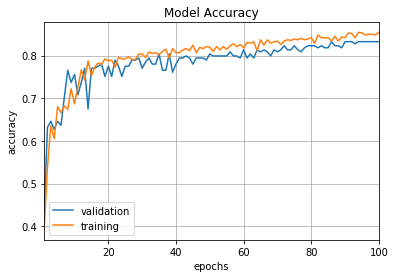

In [68]:
epochs = 100
history1 = model.fit(X_train, Y_train,validation_data = (X_test,Y_test),
          batch_size=20,epochs=epochs,shuffle=True,verbose=2)


plot_fig(1, history1)

In [13]:
#for 798 x 13
#with ADAM and crossentropy
model = Sequential([
    Dense(7,input_shape=(15,),activation="relu"),
    Dense(5,activation="relu"),
    Dense(2,activation="softmax")
    
])

model.summary()

model.compile(
    Adam(lr=.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

'''
model.compile(
    Adam(lr=.001),loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

model.compile(
    Adam(lr=.001),loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

'''

#relu
#LeakyReLU
#PReLU
#softmax
#sigmoid
#hard_sigmoid
#tanh
#elu
#ELU
#selu
#softplus
#softsign
#
#
#

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 7)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
Total params: 164
Trainable params: 164
Non-trainable params: 0
_________________________________________________________________


"\nmodel.compile(\n    Adam(lr=.001),loss='sparse_categorical_crossentropy',metrics=['accuracy']\n)\n\nmodel.compile(\n    Adam(lr=.001),loss='sparse_categorical_crossentropy',metrics=['accuracy']\n)\n\nmodel.compile(loss='categorical_crossentropy',\n              optimizer='adam',\n              metrics=['accuracy'])\n\n"

In [14]:
#model.fit(X_train, Y_train,batch_size=25,epochs=2000,shuffle=True,verbose=2)

Train on 626 samples, validate on 209 samples
Epoch 1/100
 - 0s - loss: 0.3632 - acc: 0.8482 - val_loss: 0.4430 - val_acc: 0.8134
Epoch 2/100
 - 0s - loss: 0.3692 - acc: 0.8419 - val_loss: 0.4456 - val_acc: 0.8134
Epoch 3/100
 - 0s - loss: 0.3644 - acc: 0.8530 - val_loss: 0.4301 - val_acc: 0.8182
Epoch 4/100
 - 0s - loss: 0.3640 - acc: 0.8466 - val_loss: 0.4327 - val_acc: 0.8182
Epoch 5/100
 - 0s - loss: 0.3677 - acc: 0.8498 - val_loss: 0.4714 - val_acc: 0.8086
Epoch 6/100
 - 0s - loss: 0.3720 - acc: 0.8466 - val_loss: 0.4479 - val_acc: 0.8134
Epoch 7/100
 - 0s - loss: 0.3631 - acc: 0.8498 - val_loss: 0.4280 - val_acc: 0.8182
Epoch 8/100
 - 0s - loss: 0.3644 - acc: 0.8466 - val_loss: 0.4555 - val_acc: 0.8182
Epoch 9/100
 - 0s - loss: 0.3671 - acc: 0.8498 - val_loss: 0.4325 - val_acc: 0.8182
Epoch 10/100
 - 0s - loss: 0.3634 - acc: 0.8514 - val_loss: 0.4278 - val_acc: 0.8086
Epoch 11/100
 - 0s - loss: 0.3658 - acc: 0.8466 - val_loss: 0.4300 - val_acc: 0.8182
Epoch 12/100
 - 0s - loss: 0

Epoch 97/100
 - 0s - loss: 0.3631 - acc: 0.8498 - val_loss: 0.4330 - val_acc: 0.8038
Epoch 98/100
 - 0s - loss: 0.3600 - acc: 0.8610 - val_loss: 0.4347 - val_acc: 0.8086
Epoch 99/100
 - 0s - loss: 0.3654 - acc: 0.8450 - val_loss: 0.4435 - val_acc: 0.8086
Epoch 100/100
 - 0s - loss: 0.3678 - acc: 0.8514 - val_loss: 0.4296 - val_acc: 0.8134


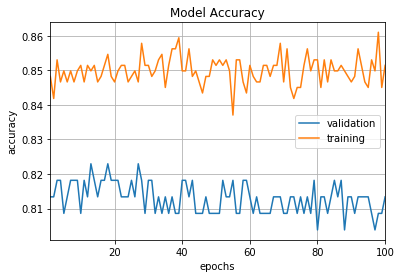

In [19]:
model.compile(
    Adam(lr=.001),loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

histogrum10 = model.fit(X_train, Y_train,validation_data = (X_test,Y_test),
          batch_size=20,epochs=100,shuffle=True,verbose=2)
epochs=100
plot_fig(1, histogrum10)

In [44]:
model.compile(
    Adam(lr=.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

model.fit(X_train, Y_train,validation_data = (X_test,Y_test),
          batch_size=20,epochs=100,shuffle=True,verbose=2)

Train on 638 samples, validate on 160 samples
Epoch 1/100
 - 0s - loss: 0.3409 - acc: 0.8621 - val_loss: 0.3656 - val_acc: 0.8500
Epoch 2/100
 - 0s - loss: 0.3404 - acc: 0.8605 - val_loss: 0.3658 - val_acc: 0.8500
Epoch 3/100
 - 0s - loss: 0.3399 - acc: 0.8589 - val_loss: 0.3661 - val_acc: 0.8500
Epoch 4/100
 - 0s - loss: 0.3394 - acc: 0.8589 - val_loss: 0.3664 - val_acc: 0.8500
Epoch 5/100
 - 0s - loss: 0.3391 - acc: 0.8589 - val_loss: 0.3666 - val_acc: 0.8500
Epoch 6/100
 - 0s - loss: 0.3388 - acc: 0.8589 - val_loss: 0.3669 - val_acc: 0.8500
Epoch 7/100
 - 0s - loss: 0.3385 - acc: 0.8589 - val_loss: 0.3673 - val_acc: 0.8500
Epoch 8/100
 - 0s - loss: 0.3383 - acc: 0.8589 - val_loss: 0.3676 - val_acc: 0.8562
Epoch 9/100
 - 0s - loss: 0.3381 - acc: 0.8589 - val_loss: 0.3678 - val_acc: 0.8562
Epoch 10/100
 - 0s - loss: 0.3380 - acc: 0.8605 - val_loss: 0.3680 - val_acc: 0.8562
Epoch 11/100
 - 0s - loss: 0.3379 - acc: 0.8605 - val_loss: 0.3683 - val_acc: 0.8562
Epoch 12/100
 - 0s - loss: 0

Epoch 97/100
 - 0s - loss: 0.3370 - acc: 0.8605 - val_loss: 0.3714 - val_acc: 0.8687
Epoch 98/100
 - 0s - loss: 0.3371 - acc: 0.8605 - val_loss: 0.3715 - val_acc: 0.8687
Epoch 99/100
 - 0s - loss: 0.3370 - acc: 0.8605 - val_loss: 0.3712 - val_acc: 0.8687
Epoch 100/100
 - 0s - loss: 0.3370 - acc: 0.8605 - val_loss: 0.3713 - val_acc: 0.8687


In [63]:
# Create Model 
'''
model = Sequential() 
model.add(Dense(7, input_shape=(15,) , activation= 'relu'))
model.add(Dense(6, activation= 'relu'))
model.add(Dense(2 , activation = 'softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)

model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])
model.summary()
'''
# Create Model 

model = Sequential() 
model.add(Dense(7, input_shape=(15,) , activation= 'relu'))
#model.add(Dense(16, activation= 'relu'))
model.add(Dense(2 , activation = 'softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)

model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 7)                 112       
_________________________________________________________________
dense_60 (Dense)             (None, 2)                 16        
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


Train on 626 samples, validate on 209 samples
Epoch 1/1000
 - 1s - loss: 0.7751 - acc: 0.5511 - val_loss: 0.6675 - val_acc: 0.5789
Epoch 2/1000
 - 0s - loss: 0.6602 - acc: 0.6198 - val_loss: 0.6911 - val_acc: 0.5215
Epoch 3/1000
 - 0s - loss: 0.6437 - acc: 0.6166 - val_loss: 0.6396 - val_acc: 0.5837
Epoch 4/1000
 - 0s - loss: 0.6178 - acc: 0.6661 - val_loss: 0.6088 - val_acc: 0.7895
Epoch 5/1000
 - 0s - loss: 0.6146 - acc: 0.7141 - val_loss: 0.5845 - val_acc: 0.8086
Epoch 6/1000
 - 0s - loss: 0.5758 - acc: 0.7412 - val_loss: 0.6656 - val_acc: 0.5359
Epoch 7/1000
 - 0s - loss: 0.5978 - acc: 0.6821 - val_loss: 0.5420 - val_acc: 0.8134
Epoch 8/1000
 - 0s - loss: 0.5094 - acc: 0.8115 - val_loss: 0.5536 - val_acc: 0.7656
Epoch 9/1000
 - 0s - loss: 0.4871 - acc: 0.8243 - val_loss: 0.7644 - val_acc: 0.4402
Epoch 10/1000
 - 0s - loss: 0.6065 - acc: 0.6805 - val_loss: 0.5243 - val_acc: 0.8134
Epoch 11/1000
 - 0s - loss: 0.4739 - acc: 0.8227 - val_loss: 0.4828 - val_acc: 0.8182
Epoch 12/1000
 - 

Epoch 96/1000
 - 0s - loss: 0.4939 - acc: 0.8083 - val_loss: 0.4778 - val_acc: 0.8278
Epoch 97/1000
 - 0s - loss: 0.4075 - acc: 0.8435 - val_loss: 0.5443 - val_acc: 0.7177
Epoch 98/1000
 - 0s - loss: 0.5392 - acc: 0.7987 - val_loss: 0.6457 - val_acc: 0.8038
Epoch 99/1000
 - 0s - loss: 0.4582 - acc: 0.8339 - val_loss: 0.6966 - val_acc: 0.7799
Epoch 100/1000
 - 0s - loss: 0.5791 - acc: 0.8115 - val_loss: 0.8965 - val_acc: 0.4211
Epoch 101/1000
 - 0s - loss: 0.5429 - acc: 0.7652 - val_loss: 0.5039 - val_acc: 0.8134
Epoch 102/1000
 - 0s - loss: 0.4637 - acc: 0.8243 - val_loss: 0.4783 - val_acc: 0.8278
Epoch 103/1000
 - 0s - loss: 0.4813 - acc: 0.7939 - val_loss: 0.4837 - val_acc: 0.7895
Epoch 104/1000
 - 0s - loss: 0.5026 - acc: 0.7955 - val_loss: 0.4812 - val_acc: 0.8278
Epoch 105/1000
 - 0s - loss: 0.4636 - acc: 0.8115 - val_loss: 0.4600 - val_acc: 0.8278
Epoch 106/1000
 - 0s - loss: 0.4245 - acc: 0.8419 - val_loss: 0.5396 - val_acc: 0.8134
Epoch 107/1000
 - 0s - loss: 0.4162 - acc: 0.84

Epoch 191/1000
 - 0s - loss: 0.4118 - acc: 0.8514 - val_loss: 0.4875 - val_acc: 0.7799
Epoch 192/1000
 - 0s - loss: 0.4741 - acc: 0.8211 - val_loss: 0.6057 - val_acc: 0.7943
Epoch 193/1000
 - 0s - loss: 0.4963 - acc: 0.7987 - val_loss: 0.5827 - val_acc: 0.8134
Epoch 194/1000
 - 0s - loss: 0.5770 - acc: 0.7572 - val_loss: 0.7473 - val_acc: 0.4976
Epoch 195/1000
 - 0s - loss: 0.5134 - acc: 0.7827 - val_loss: 0.4590 - val_acc: 0.8278
Epoch 196/1000
 - 0s - loss: 0.4452 - acc: 0.8259 - val_loss: 0.4756 - val_acc: 0.8278
Epoch 197/1000
 - 0s - loss: 0.4275 - acc: 0.8419 - val_loss: 0.4703 - val_acc: 0.8278
Epoch 198/1000
 - 0s - loss: 0.4910 - acc: 0.8003 - val_loss: 0.4541 - val_acc: 0.8325
Epoch 199/1000
 - 0s - loss: 0.4407 - acc: 0.8387 - val_loss: 0.4789 - val_acc: 0.7990
Epoch 200/1000
 - 0s - loss: 0.4031 - acc: 0.8435 - val_loss: 0.4545 - val_acc: 0.8278
Epoch 201/1000
 - 0s - loss: 0.4217 - acc: 0.8419 - val_loss: 0.5039 - val_acc: 0.7751
Epoch 202/1000
 - 0s - loss: 0.4741 - acc: 

 - 0s - loss: 0.4483 - acc: 0.8243 - val_loss: 0.5197 - val_acc: 0.8134
Epoch 286/1000
 - 0s - loss: 0.4330 - acc: 0.8514 - val_loss: 0.5676 - val_acc: 0.8038
Epoch 287/1000
 - 0s - loss: 0.4416 - acc: 0.8179 - val_loss: 0.4577 - val_acc: 0.8134
Epoch 288/1000
 - 0s - loss: 0.4289 - acc: 0.8403 - val_loss: 0.4946 - val_acc: 0.8278
Epoch 289/1000
 - 0s - loss: 0.4235 - acc: 0.8307 - val_loss: 0.5406 - val_acc: 0.7273
Epoch 290/1000
 - 0s - loss: 0.5352 - acc: 0.7620 - val_loss: 0.7891 - val_acc: 0.7895
Epoch 291/1000
 - 0s - loss: 0.4855 - acc: 0.8099 - val_loss: 0.5103 - val_acc: 0.7751
Epoch 292/1000
 - 0s - loss: 0.4275 - acc: 0.8339 - val_loss: 0.4828 - val_acc: 0.8278
Epoch 293/1000
 - 0s - loss: 0.4514 - acc: 0.8419 - val_loss: 0.5319 - val_acc: 0.7368
Epoch 294/1000
 - 0s - loss: 0.5198 - acc: 0.7732 - val_loss: 0.4498 - val_acc: 0.8325
Epoch 295/1000
 - 0s - loss: 0.4507 - acc: 0.8371 - val_loss: 0.5257 - val_acc: 0.7464
Epoch 296/1000
 - 0s - loss: 0.4241 - acc: 0.8339 - val_lo

Epoch 380/1000
 - 0s - loss: 0.4599 - acc: 0.8291 - val_loss: 0.4486 - val_acc: 0.8278
Epoch 381/1000
 - 0s - loss: 0.4291 - acc: 0.8307 - val_loss: 0.5623 - val_acc: 0.8038
Epoch 382/1000
 - 0s - loss: 0.4392 - acc: 0.8355 - val_loss: 0.4458 - val_acc: 0.8278
Epoch 383/1000
 - 0s - loss: 0.4729 - acc: 0.8035 - val_loss: 0.4542 - val_acc: 0.8182
Epoch 384/1000
 - 0s - loss: 0.4476 - acc: 0.8339 - val_loss: 0.4538 - val_acc: 0.8278
Epoch 385/1000
 - 0s - loss: 0.4717 - acc: 0.8083 - val_loss: 0.5498 - val_acc: 0.7273
Epoch 386/1000
 - 0s - loss: 0.4280 - acc: 0.8355 - val_loss: 0.5405 - val_acc: 0.8134
Epoch 387/1000
 - 0s - loss: 0.4559 - acc: 0.8419 - val_loss: 0.5059 - val_acc: 0.8134
Epoch 388/1000
 - 0s - loss: 0.4181 - acc: 0.8419 - val_loss: 0.4736 - val_acc: 0.8278
Epoch 389/1000
 - 0s - loss: 0.4316 - acc: 0.8435 - val_loss: 0.4502 - val_acc: 0.8278
Epoch 390/1000
 - 0s - loss: 0.4109 - acc: 0.8450 - val_loss: 0.4529 - val_acc: 0.8182
Epoch 391/1000
 - 0s - loss: 0.4738 - acc: 

 - 0s - loss: 0.4108 - acc: 0.8419 - val_loss: 0.4483 - val_acc: 0.8278
Epoch 475/1000
 - 0s - loss: 0.4114 - acc: 0.8387 - val_loss: 0.6368 - val_acc: 0.5789
Epoch 476/1000
 - 0s - loss: 0.4689 - acc: 0.8131 - val_loss: 0.4734 - val_acc: 0.8230
Epoch 477/1000
 - 0s - loss: 0.4817 - acc: 0.8179 - val_loss: 0.4459 - val_acc: 0.8278
Epoch 478/1000
 - 0s - loss: 0.4484 - acc: 0.8355 - val_loss: 0.4482 - val_acc: 0.8278
Epoch 479/1000
 - 0s - loss: 0.4473 - acc: 0.8435 - val_loss: 0.4743 - val_acc: 0.8278
Epoch 480/1000
 - 0s - loss: 0.4569 - acc: 0.8211 - val_loss: 0.7050 - val_acc: 0.7895
Epoch 481/1000
 - 0s - loss: 0.4637 - acc: 0.8227 - val_loss: 0.4570 - val_acc: 0.8278
Epoch 482/1000
 - 0s - loss: 0.5331 - acc: 0.7875 - val_loss: 0.8691 - val_acc: 0.4593
Epoch 483/1000
 - 0s - loss: 0.5030 - acc: 0.7764 - val_loss: 0.8847 - val_acc: 0.7656
Epoch 484/1000
 - 0s - loss: 0.5127 - acc: 0.8179 - val_loss: 0.4862 - val_acc: 0.7895
Epoch 485/1000
 - 0s - loss: 0.4286 - acc: 0.8403 - val_lo

Epoch 569/1000
 - 0s - loss: 0.4724 - acc: 0.8227 - val_loss: 0.6236 - val_acc: 0.6507
Epoch 570/1000
 - 0s - loss: 0.5381 - acc: 0.7859 - val_loss: 0.4749 - val_acc: 0.7990
Epoch 571/1000
 - 0s - loss: 0.4438 - acc: 0.8355 - val_loss: 0.4563 - val_acc: 0.8230
Epoch 572/1000
 - 0s - loss: 0.4627 - acc: 0.8387 - val_loss: 0.4549 - val_acc: 0.8230
Epoch 573/1000
 - 0s - loss: 0.4856 - acc: 0.7923 - val_loss: 0.4624 - val_acc: 0.8134
Epoch 574/1000
 - 0s - loss: 0.4563 - acc: 0.8291 - val_loss: 0.4709 - val_acc: 0.8278
Epoch 575/1000
 - 0s - loss: 0.4349 - acc: 0.8435 - val_loss: 0.5094 - val_acc: 0.8134
Epoch 576/1000
 - 0s - loss: 0.4530 - acc: 0.8307 - val_loss: 0.5412 - val_acc: 0.7368
Epoch 577/1000
 - 0s - loss: 0.4982 - acc: 0.8131 - val_loss: 0.4590 - val_acc: 0.8230
Epoch 578/1000
 - 0s - loss: 0.4190 - acc: 0.8403 - val_loss: 0.4513 - val_acc: 0.8325
Epoch 579/1000
 - 0s - loss: 0.4269 - acc: 0.8450 - val_loss: 0.4564 - val_acc: 0.8230
Epoch 580/1000
 - 0s - loss: 0.4288 - acc: 

 - 0s - loss: 0.4250 - acc: 0.8419 - val_loss: 0.4524 - val_acc: 0.8230
Epoch 664/1000
 - 0s - loss: 0.4830 - acc: 0.8019 - val_loss: 0.5428 - val_acc: 0.8278
Epoch 665/1000
 - 0s - loss: 0.4637 - acc: 0.8291 - val_loss: 0.4533 - val_acc: 0.8278
Epoch 666/1000
 - 0s - loss: 0.4215 - acc: 0.8435 - val_loss: 0.5655 - val_acc: 0.8134
Epoch 667/1000
 - 0s - loss: 0.4176 - acc: 0.8387 - val_loss: 0.4826 - val_acc: 0.8134
Epoch 668/1000
 - 0s - loss: 0.4910 - acc: 0.7987 - val_loss: 0.4691 - val_acc: 0.8278
Epoch 669/1000
 - 0s - loss: 0.4376 - acc: 0.8323 - val_loss: 0.4558 - val_acc: 0.8134
Epoch 670/1000
 - 0s - loss: 0.4210 - acc: 0.8323 - val_loss: 0.4753 - val_acc: 0.8278
Epoch 671/1000
 - 0s - loss: 0.4185 - acc: 0.8419 - val_loss: 0.4565 - val_acc: 0.8230
Epoch 672/1000
 - 0s - loss: 0.4419 - acc: 0.8099 - val_loss: 0.4562 - val_acc: 0.8278
Epoch 673/1000
 - 0s - loss: 0.4286 - acc: 0.8403 - val_loss: 0.4754 - val_acc: 0.8230
Epoch 674/1000
 - 0s - loss: 0.4149 - acc: 0.8482 - val_lo

Epoch 758/1000
 - 0s - loss: 0.4615 - acc: 0.8147 - val_loss: 0.4631 - val_acc: 0.8038
Epoch 759/1000
 - 0s - loss: 0.4740 - acc: 0.8195 - val_loss: 0.5125 - val_acc: 0.8182
Epoch 760/1000
 - 0s - loss: 0.4358 - acc: 0.8323 - val_loss: 0.4702 - val_acc: 0.8278
Epoch 761/1000
 - 0s - loss: 0.4399 - acc: 0.8387 - val_loss: 0.5494 - val_acc: 0.8278
Epoch 762/1000
 - 0s - loss: 0.4682 - acc: 0.8291 - val_loss: 0.4448 - val_acc: 0.8278
Epoch 763/1000
 - 0s - loss: 0.4501 - acc: 0.8195 - val_loss: 0.4475 - val_acc: 0.8278
Epoch 764/1000
 - 0s - loss: 0.4105 - acc: 0.8355 - val_loss: 0.4497 - val_acc: 0.8230
Epoch 765/1000
 - 0s - loss: 0.4772 - acc: 0.7939 - val_loss: 0.5501 - val_acc: 0.8182
Epoch 766/1000
 - 0s - loss: 0.4437 - acc: 0.8275 - val_loss: 0.4562 - val_acc: 0.8230
Epoch 767/1000
 - 0s - loss: 0.4751 - acc: 0.8387 - val_loss: 0.5227 - val_acc: 0.7608
Epoch 768/1000
 - 0s - loss: 0.4465 - acc: 0.8195 - val_loss: 0.5359 - val_acc: 0.8134
Epoch 769/1000
 - 0s - loss: 0.4282 - acc: 

 - 0s - loss: 0.5354 - acc: 0.7923 - val_loss: 0.4530 - val_acc: 0.8134
Epoch 853/1000
 - 0s - loss: 0.4286 - acc: 0.8371 - val_loss: 0.5415 - val_acc: 0.8134
Epoch 854/1000
 - 0s - loss: 0.4589 - acc: 0.8195 - val_loss: 0.4622 - val_acc: 0.8038
Epoch 855/1000
 - 0s - loss: 0.4268 - acc: 0.8339 - val_loss: 0.4519 - val_acc: 0.8278
Epoch 856/1000
 - 0s - loss: 0.4325 - acc: 0.8307 - val_loss: 0.4686 - val_acc: 0.7990
Epoch 857/1000
 - 0s - loss: 0.4332 - acc: 0.8307 - val_loss: 0.5161 - val_acc: 0.8278
Epoch 858/1000
 - 0s - loss: 0.4650 - acc: 0.8115 - val_loss: 0.4433 - val_acc: 0.8278
Epoch 859/1000
 - 0s - loss: 0.4093 - acc: 0.8403 - val_loss: 0.4543 - val_acc: 0.8230
Epoch 860/1000
 - 0s - loss: 0.4239 - acc: 0.8466 - val_loss: 0.4584 - val_acc: 0.8134
Epoch 861/1000
 - 0s - loss: 0.4192 - acc: 0.8291 - val_loss: 0.4738 - val_acc: 0.8278
Epoch 862/1000
 - 0s - loss: 0.4309 - acc: 0.8355 - val_loss: 0.4473 - val_acc: 0.8278
Epoch 863/1000
 - 0s - loss: 0.4113 - acc: 0.8419 - val_lo

Epoch 947/1000
 - 0s - loss: 0.4257 - acc: 0.8387 - val_loss: 0.5522 - val_acc: 0.8278
Epoch 948/1000
 - 0s - loss: 0.4680 - acc: 0.8099 - val_loss: 0.5733 - val_acc: 0.8230
Epoch 949/1000
 - 0s - loss: 0.4403 - acc: 0.8435 - val_loss: 0.4592 - val_acc: 0.8230
Epoch 950/1000
 - 0s - loss: 0.4246 - acc: 0.8514 - val_loss: 0.4838 - val_acc: 0.8278
Epoch 951/1000
 - 0s - loss: 0.4932 - acc: 0.8147 - val_loss: 0.5135 - val_acc: 0.8230
Epoch 952/1000
 - 0s - loss: 0.4338 - acc: 0.8355 - val_loss: 0.6522 - val_acc: 0.8086
Epoch 953/1000
 - 0s - loss: 0.4427 - acc: 0.8291 - val_loss: 0.4699 - val_acc: 0.8230
Epoch 954/1000
 - 0s - loss: 0.4915 - acc: 0.8083 - val_loss: 0.4504 - val_acc: 0.8278
Epoch 955/1000
 - 0s - loss: 0.4064 - acc: 0.8435 - val_loss: 0.4758 - val_acc: 0.8278
Epoch 956/1000
 - 0s - loss: 0.4344 - acc: 0.8259 - val_loss: 0.4989 - val_acc: 0.8230
Epoch 957/1000
 - 0s - loss: 0.4503 - acc: 0.8195 - val_loss: 0.4527 - val_acc: 0.8278
Epoch 958/1000
 - 0s - loss: 0.4174 - acc: 

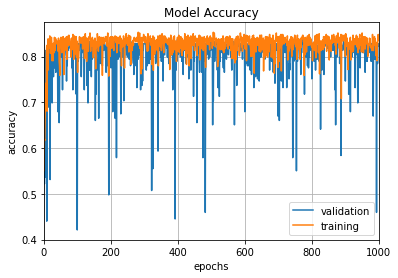

In [64]:
histogrum10 = model.fit(X_train, Y_train,validation_data = (X_test,Y_test),
          batch_size=20,epochs=1000,shuffle=True,verbose=2)
epochs=1000
plot_fig(1, histogrum10)

### model.fit(X_train, Y_train, epochs=100)

In [151]:
rounded_predections = model.predict_classes(X_test,batch_size=10,verbose=0)

In [152]:
score = model.evaluate(X_test, Y_test, batch_size=128)

167/167 [==============================] - 0s 60us/step


In [153]:
score

[0.38814316449051134, 0.8562874269342708]

In [154]:
cm = confusion_matrix(Y_test,rounded_predections)

In [157]:
rounded_predections_train = model.predict_classes(X_train,batch_size=10,verbose=0)
cm = confusion_matrix(Y_train,rounded_predections_train)

In [158]:
cm

array([[193,  77],
       [ 34, 364]])

In [209]:
cm2

array([[83,  4],
       [ 1, 79]])

numer of total test sample:  668
Model Score:  [0.38814316449051134, 0.8562874269342708]
accuracy:  0.8338323353293413
missclassafication_rate:  0.1661676646706587
Sensitivity/Recall:  0.914572864321608
Spacificity:  0.7148148148148148
Precition:  0.8253968253968254
prevalence:  0.5958083832335329
Positive Predicted Value:  0.8253968253968254
Negative Predicted Value:  0.8502202643171806
F Score:  0.8676996424314659


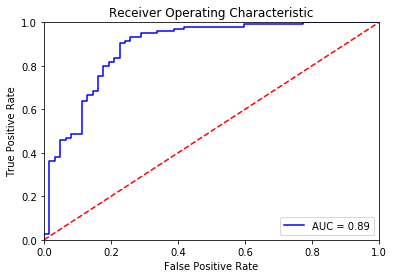

In [159]:
performance()
ROC_curve_generator()


In [16]:
def ROC_curve_generator():
    #ROC curve

    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [17]:
def performance():
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]

    n =TN+FP+FN+TP
    print("numer of total test sample: ",n)

    print("Model Score: ", score)

    accuracy = (TP+TN)/n
    print("accuracy: ",accuracy)

    missclassafication_rate = 1-accuracy
    print("missclassafication_rate: ",missclassafication_rate)

    sensitivity = TP/(TP+FN)
    print("Sensitivity/Recall: ",sensitivity)

    spasificity = TN/(TN+FP)
    print("Spacificity: ",spasificity)

    precition = TP/(FP+TP)
    print("Precition: ",precition)

    prevalence = (FN+TP)/n
    print("prevalence: ",prevalence)

    PPV = TP/(TP+FP)
    print("Positive Predicted Value: ",PPV)

    NPV = TN/(TN+FN)
    print("Negative Predicted Value: ",NPV)

    beta = 0.5
    f_score = 1/(beta*(1/precition)+(1-beta)*(1/sensitivity))
    print("F Score: ",f_score)

In [18]:
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_acc'],label='validation')
    plt.plot(range(1,epochs+1),history.history['acc'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img-'+str(i)+'-accuracy.jpg')
    plt.close(fig)

In [117]:
model.save("heart_attack_risk_prediction_with_percent_split_"+str(score[1])".h5")